In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Data directory

In [4]:
# raw_data
data_directory = os.path.join( '..','data','raw_data/')

In [5]:
# comedy link list
df_list = pd.read_csv(data_directory+'comedy_link_list.csv')

In [8]:
df_list.head()

,name,raw_title,summary,link
0,Enissa Amani,Enissa Amani: Ehrenwort (2018) Full Transcript,"Live from Hamburg, Iranian-German comedian Eni...",https://scrapsfromtheloft.com/2019/02/19/eniss...
1,George Carlin,Politically Correct Language – by George Carlin,George Carlin's critical thinking on pc langua...,https://scrapsfromtheloft.com/2019/02/18/polit...
2,Ken Jeong,"Ken Jeong: You Complete Me, Ho (2019) – Full T...",Filmed at the Ice House Comedy Club in Pasaden...,https://scrapsfromtheloft.com/2019/02/17/ken-j...
3,Ray Romano,"Ray Romano: Right Here, Around the Corner (201...",Ray Romano cut his stand-up teeth at the Comed...,https://scrapsfromtheloft.com/2019/02/12/ray-r...
4,Gabriel Iglesias,Gabriel “Fluffy” Iglesias: One Show Fits All (...,"In a new special from Houston, Gabriel ""Fluffy...",https://scrapsfromtheloft.com/2019/01/30/gabri...


In [11]:
# data_transcrips
df_transcripts = pd.read_csv(data_directory+'data_transcripts.csv')
df_transcripts.drop(['Unnamed: 0'],axis=1,inplace=True)

In [13]:
df_transcripts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
transcript    244 non-null object
link          244 non-null object
dtypes: object(2)
memory usage: 3.9+ KB


In [14]:
df_transcripts.head()

,transcript,link
0,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s...",https://scrapsfromtheloft.com/2019/02/19/eniss...
1,"I know I’m a little late with this, but I’d li...",https://scrapsfromtheloft.com/2019/02/18/polit...
2,The Hangover… Community… Dr. Ken… Crazy Rich A...,https://scrapsfromtheloft.com/2019/02/17/ken-j...
3,It’s been 23 years since I did a comedy specia...,https://scrapsfromtheloft.com/2019/02/12/ray-r...
4,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,https://scrapsfromtheloft.com/2019/01/30/gabri...


## Merge datframes
- on "link"

In [19]:
data = df_list.merge(df_transcripts,left_on='link',right_on='link')

In [20]:
data.head()

,name,raw_title,summary,link,transcript
0,Enissa Amani,Enissa Amani: Ehrenwort (2018) Full Transcript,"Live from Hamburg, Iranian-German comedian Eni...",https://scrapsfromtheloft.com/2019/02/19/eniss...,"A NETFLIX ORIGINAL COMEDY SPECIAL\nHey, what’s..."
1,George Carlin,Politically Correct Language – by George Carlin,George Carlin's critical thinking on pc langua...,https://scrapsfromtheloft.com/2019/02/18/polit...,"I know I’m a little late with this, but I’d li..."
2,Ken Jeong,"Ken Jeong: You Complete Me, Ho (2019) – Full T...",Filmed at the Ice House Comedy Club in Pasaden...,https://scrapsfromtheloft.com/2019/02/17/ken-j...,The Hangover… Community… Dr. Ken… Crazy Rich A...
3,Ray Romano,"Ray Romano: Right Here, Around the Corner (201...",Ray Romano cut his stand-up teeth at the Comed...,https://scrapsfromtheloft.com/2019/02/12/ray-r...,It’s been 23 years since I did a comedy specia...
4,Gabriel Iglesias,Gabriel “Fluffy” Iglesias: One Show Fits All (...,"In a new special from Houston, Gabriel ""Fluffy...",https://scrapsfromtheloft.com/2019/01/30/gabri...,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...


## Display null data

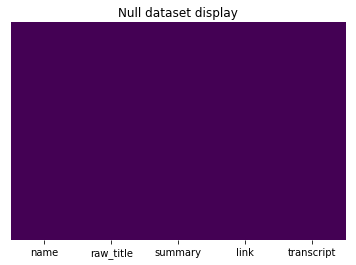

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [29]:
# change col order
data = data[['name','raw_title','summary','transcript','link']]

## Save

In [30]:
data.to_csv(data_directory+'03_data_merge.csv',index=False)